In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
N = 100
C = 2

In [13]:
def s(x):
    return x**2 / 2

In [14]:
rng = np.random.default_rng()

(array([0.17226051, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.17226051, 0.        ,
        0.17226051, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17226051, 0.        , 0.17226051, 0.        ,
        0.        , 0.        , 0.86130253, 0.        , 0.86130253,
        0.        , 0.        , 0.34452101, 0.17226051, 0.34452101,
        0.17226051, 0.51678152, 0.        , 0.34452101, 0.51678152,
        0.        , 0.68904202, 0.17226051, 0.        , 1.03356303,
        0.51678152, 0.86130253, 0.34452101, 0.34452101, 0.86130253,
        0.        , 0.17226051, 1.03356303, 0.51678152, 0.34452101,
        0.34452101, 0.34452101, 0.17226051, 0.        , 0.17226051,
        1.03356303, 0.68904202, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.17226051, 0.        , 0.34452101,
        0.        , 0.17226051, 0.17226051, 0.34

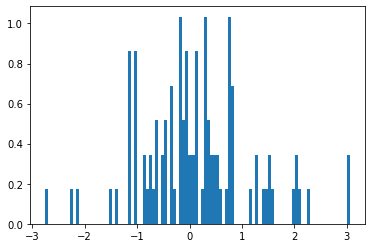

In [15]:
samples = []
update_cnt = 0
x = 0
for _ in range(N):
    dt = (rng.random() - 0.5) * C * 2
    if rng.random() < np.exp(s(x) - s(x + dt)):
        x = x + dt
        update_cnt += 1
    samples.append(x)
samples = np.array(samples)
plt.hist(np.array(samples), bins=100, density=True)

In [16]:
update_cnt / N

0.68

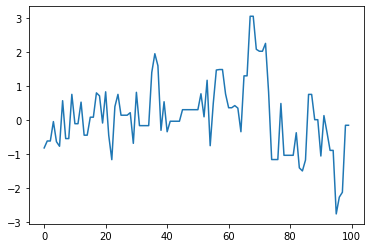

In [17]:
plt.plot(samples)

In [32]:
np.average(np.array(samples)**2)

0.9931040471229349

In [41]:
jackknife_err = []
squared = samples**2
f_bar = np.average(squared)
for w in range(1, 10000):
    l = len(squared) // w
    grouped = squared[:l*w].reshape(l, w)
    each_ave = np.average(grouped, axis=1)
    jackknife_err.append(np.sqrt(((each_ave - f_bar)**2).sum() / l / (l - 1)))

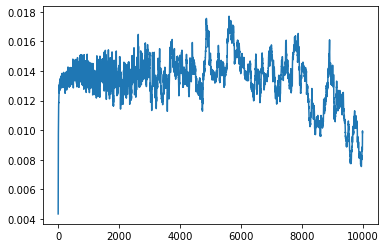

In [42]:
plt.plot(jackknife_err)